<a href="https://colab.research.google.com/github/Mar-celo/Enap/blob/master/ENEM_2019_socio_economico_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desempenho ENEM

Modelagem de Desempenho no Enem: identificação das escolas que mais agregam resultados aos seus alunos

Tradicionalmente consideram-se melhores escolas aquelas com melhores resultados médios de seus alunos. No entanto, muito do resultado de um aluno está fortemente relacionado às suas características sócio-econômicas, que também estão associadas à escola que cursa. Deseja-se um método objetivo para distinguir escolas com alunos com desempenhos abaixo ou acima do que se espera deles, em função dessas características socioeconômicas, que possa ser imputado como contribuição da escola.

Por exemplo, se considerarmos apenas o fator renda dos pais, poderia-se agregar as escolas em patamares dessa renda e assim, para cada segmento, identificar as escolas com melhores resultados o que limitaria a influência do fator renda dentro de cada segmento. Idealmente, procuraríamos generalizar esse isolamento de fatores, treinando um modelo preditivo para que estime o desempenho de um aluno em função de todas as suas características, excluindo apenas a escola frequentada. Depois compararíamos esse desempenho estimado com o desempenho real e ordenaríamos as escolas pela contribuição ao desempenho além do esperado.

Os microdados anonimizados do Enem encontram-se publicados pelo Inep (http://inep.gov.br/web/guest/microdados) com boa qualidade de dados em múltiplos anos, para milhões de alunos. Os dados socioeconômicos e de desempenho na prova encontram-se presentes para cada aluno individualmente, viabilizando assim a modelagem desejada. 

Exemplo de análise dos dados do ENEM para identificação de melhores escolas, considerando diversas características: https://exame.com/brasil/7-rankings-mais-realistas-do-desempenho-das-escolas-no-enem/

Micro-dados ENEM 2019: http://download.inep.gov.br/microdados/microdados_enem_2019.zip
650MB compactados, 3GB final


A seguinte análise serve para conhecer melhor os dados disponíveis, apresentar alguma técnicas básicas de análise utilizando pandas e responder a algumas perguntas sobre os dados:

* número total de alunos do Enem 2019:
* relação entre desempenho e 
    - renda dos pais
    - gênero
    - raça
    - tipo de escola, pública ou privada
    - estado de origem
    - etc.

* reproduzir a análise e os resultados do excelente exemplo de jornalismo de dados realizado pelo jornal Estadão: 
http://infograficos.estadao.com.br/educacao/enem/desigualdades-de-genero-e-raca/

Dicionário de dados disponível junto com os dados baixados: recomenda-se a leitura para entendimento do significado das colunas

Aproveitei código de [Gustavo Bonesso](https://www.kaggle.com/gbonesso) para a análise inicial de 2016.

Recomendo começar as análises com um recorte que reduza o número de observações, seja diretamente limitando o número de linhas que serão lidas ou indiretamente selecionando um único estado ou município. O importante é que consiga validar rapidamente suas hipóteses antes de rodar o treinamento com todos os dados disponíveis.

O dataset Enem 2019 contém 5.095.270 de linhas! Então vejam com cuidado qual o tamanho do seu recorte que lhe permite trabalhar com velocidade.

Para facilitar o acesso ao dicionário de dados, fiz um upload separado nos arquivos da turma: https://drive.google.com/file/d/1hUB_2ySBsOfvIQxHxL4cyE7WY_739BhB/view?usp=sharing

In [ ]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import gc # Garbage collector, para recuperar memória após carregar o dataset inicial
    
#%matplotlib inline

# Input data files are available in the "./microdados_enem_2019/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

In [ ]:
print(os.listdir("."))

['.ipynb_checkpoints', '06_ML.v1.pptx', 'df_enem2019.csv', 'ENEM', 'ENEM_2019_socio_economico.v1.ipynb', 'past', 'temp', '~$06_ML.v1.pptx']


In [ ]:
path = './df_enem2019.csv'

In [ ]:
# fonte: ./microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv
# Considerando o tamanho do dataset é prudente descobrir sua estrutura aos poucos, 
# sem procurar carregar tudo de uma só vez
# Lê só as 5 primeiras linhas
df = pd.read_csv(path, 
                 nrows=1000, # só as 5 primeiras linhas
                 encoding='utf-8', 
                 sep=',')
df

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001009418,2019,5300108,Brasília,53,DF,20,M,1,1,...,B,A,A,C,A,A,C,A,B,B
1,190001041173,2019,5300108,Brasília,53,DF,17,F,1,3,...,B,A,A,B,A,A,C,B,A,B
2,190001123448,2019,5300108,Brasília,53,DF,22,F,1,3,...,A,A,A,B,A,A,D,B,A,B
3,190001128418,2019,5300108,Brasília,53,DF,21,F,1,3,...,A,A,A,B,B,B,C,A,A,B
4,190001132590,2019,5300108,Brasília,53,DF,19,F,1,3,...,B,A,A,C,B,A,C,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190002024667,2019,5300108,Brasília,53,DF,19,M,1,3,...,B,A,A,B,A,A,C,A,B,B
996,190002024668,2019,5300108,Brasília,53,DF,19,M,1,1,...,B,A,B,D,A,B,E,A,D,B
997,190002024669,2019,5300108,Brasília,53,DF,23,F,1,3,...,B,A,B,B,A,B,E,B,B,B
998,190002024670,2019,5300108,Brasília,53,DF,18,F,1,1,...,B,A,A,B,A,A,D,B,C,B


In [ ]:
# 136 colunas!
# Mostra o nome das colunas
print(list(df.columns))
len(df.columns)

['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_

136

In [ ]:
# Caso queira referenciar um conjunto de colunas por posição e não apenas por nome
list(zip(range(len(df.columns)), df.columns))

[(0, 'NU_INSCRICAO'),
 (1, 'NU_ANO'),
 (2, 'CO_MUNICIPIO_RESIDENCIA'),
 (3, 'NO_MUNICIPIO_RESIDENCIA'),
 (4, 'CO_UF_RESIDENCIA'),
 (5, 'SG_UF_RESIDENCIA'),
 (6, 'NU_IDADE'),
 (7, 'TP_SEXO'),
 (8, 'TP_ESTADO_CIVIL'),
 (9, 'TP_COR_RACA'),
 (10, 'TP_NACIONALIDADE'),
 (11, 'CO_MUNICIPIO_NASCIMENTO'),
 (12, 'NO_MUNICIPIO_NASCIMENTO'),
 (13, 'CO_UF_NASCIMENTO'),
 (14, 'SG_UF_NASCIMENTO'),
 (15, 'TP_ST_CONCLUSAO'),
 (16, 'TP_ANO_CONCLUIU'),
 (17, 'TP_ESCOLA'),
 (18, 'TP_ENSINO'),
 (19, 'IN_TREINEIRO'),
 (20, 'CO_ESCOLA'),
 (21, 'CO_MUNICIPIO_ESC'),
 (22, 'NO_MUNICIPIO_ESC'),
 (23, 'CO_UF_ESC'),
 (24, 'SG_UF_ESC'),
 (25, 'TP_DEPENDENCIA_ADM_ESC'),
 (26, 'TP_LOCALIZACAO_ESC'),
 (27, 'TP_SIT_FUNC_ESC'),
 (28, 'IN_BAIXA_VISAO'),
 (29, 'IN_CEGUEIRA'),
 (30, 'IN_SURDEZ'),
 (31, 'IN_DEFICIENCIA_AUDITIVA'),
 (32, 'IN_SURDO_CEGUEIRA'),
 (33, 'IN_DEFICIENCIA_FISICA'),
 (34, 'IN_DEFICIENCIA_MENTAL'),
 (35, 'IN_DEFICIT_ATENCAO'),
 (36, 'IN_DISLEXIA'),
 (37, 'IN_DISCALCULIA'),
 (38, 'IN_AUTISMO'),
 (39, '

A semântica das variáveis representadas nas colunas do dataset está descrita no dicionário de dados.

Assim, podemos importar seletivamente apenas as colunas que sejam necessárias para a análise.

Exemplo:

In [ ]:
# Seleciona as colunas de interesse
# As colunas do questionário socioeconômico são de nome Q001 a Q025
colunas = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

In [ ]:
# Forma alternativa de selecionar as mesmas colunas
df.columns[-25:]

Index(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'],
      dtype='object')

In [ ]:
# recorte para o questionário socioeconomico (se)
se = df[colunas]
se.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,D,E,C,D,2,G,B,C,D,B,...,B,A,A,C,A,A,C,A,B,B
1,G,G,D,D,2,I,A,B,C,A,...,B,A,A,B,A,A,C,B,A,B
2,F,E,D,B,4,C,A,B,C,A,...,A,A,A,B,A,A,D,B,A,B
3,E,E,A,C,3,B,A,B,C,A,...,A,A,A,B,B,B,C,A,A,B
4,E,C,F,F,4,D,C,C,C,B,...,B,A,A,C,B,A,C,B,B,B


In [ ]:
# Separa as variáveis independentes (features) da variável dependente (target)
X = se.drop(['Q006'], axis=1)
y = se['Q006']

In [ ]:
X.sample(10)

,Q001,Q002,Q003,Q004,Q005,Q007,Q008,Q009,Q010,Q011,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
218,D,F,C,C,4,A,C,C,B,A,...,B,A,A,B,A,A,D,A,B,B
889,E,G,D,D,3,A,C,C,B,A,...,B,A,B,C,A,B,D,B,E,B
45,B,B,C,B,3,A,C,C,A,A,...,B,A,A,B,A,A,C,B,B,B
46,C,E,F,B,5,A,C,D,B,A,...,B,A,A,C,A,A,E,B,A,B
725,E,G,D,D,4,A,D,D,C,A,...,B,A,B,D,A,A,E,A,B,B
857,C,E,F,F,5,A,B,C,A,A,...,B,A,A,B,B,A,B,A,A,B
652,H,E,F,B,4,C,B,B,A,A,...,A,A,A,B,A,A,C,A,B,B
358,H,E,B,B,4,A,C,C,B,A,...,B,A,B,B,A,A,D,A,A,B
740,C,F,B,B,5,A,C,D,B,C,...,B,A,B,C,B,B,E,A,B,B
73,E,F,B,B,3,A,B,D,B,A,...,B,A,A,C,A,B,D,B,B,B


In [ ]:
y.sample(10)

413    D
14     B
727    C
253    I
882    E
488    J
414    E
400    C
839    N
126    B
Name: Q006, dtype: object

Para facilitar o acesso ao dicionário de dados, fiz um upload separado nos arquivos da turma: https://drive.google.com/file/d/1hUB_2ySBsOfvIQxHxL4cyE7WY_739BhB/view?usp=sharing

In [ ]:
# Olhem o dicionário de dados acima, para associado ao dataset em: 
# Considerando que os patamares de intensidade das variáveis independentes estão estão
# associados a letras em ordem alfabética crescente, podemos utilizar um encoder ordinal!
# Mas, lembre-se de também testar um OneHotEncoder para garantir.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder().fit(X)

In [ ]:
enc.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'E'], dtype=object),
 array(['A', 'B', 'C', 'D'], dtype=object),
 array(['A', 'B', 'E'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E'], dtype=object),
 a

In [ ]:
enc.transform(X)

array([[3., 4., 2., ..., 0., 1., 1.],
       [6., 6., 3., ..., 1., 0., 1.],
       [5., 4., 3., ..., 1., 0., 1.],
       ...,
       [3., 4., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 2., 1.],
       [3., 6., 2., ..., 0., 1., 1.]])

In [ ]:
# Agora vamos treinar nosso classificador básico (logistic regression) para uma primeira tentativa
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
# Partição treino/teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((800, 24), (800,))

In [ ]:
X_test.shape, y_test.shape

((200, 24), (200,))

In [ ]:
# Observem que houve um shuffle na ordem das linhas
X_train

,Q001,Q002,Q003,Q004,Q005,Q007,Q008,Q009,Q010,Q011,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
29,A,A,A,A,4,A,B,A,A,A,...,A,A,A,B,A,A,B,A,A,B
535,E,E,B,B,1,A,B,B,A,A,...,A,A,A,B,A,A,B,A,B,B
695,E,E,D,D,3,A,B,D,B,A,...,B,A,A,B,A,B,D,B,B,B
557,B,C,D,C,3,B,C,D,C,A,...,B,A,A,B,A,B,D,B,D,B
836,B,D,B,B,6,A,B,D,A,B,...,A,A,A,B,B,A,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,E,B,F,B,3,A,B,B,A,B,...,B,A,A,B,B,A,C,A,A,A
270,B,C,A,A,4,A,B,B,A,A,...,A,A,A,B,A,A,B,A,A,B
860,E,E,F,D,2,A,B,C,A,A,...,B,A,A,B,A,A,C,A,A,B
435,E,E,C,B,5,A,B,C,B,A,...,B,A,B,C,A,A,D,A,B,B


In [ ]:
y.value_counts()

C    301
B    212
E     96
D     85
G     58
A     36
H     34
I     33
F     29
N     20
Q     20
P     17
K     17
L     13
O     12
J     12
M      5
Name: Q006, dtype: int64

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: could not convert string to float: 'B'

In [ ]:
# INterpretação?

In [ ]:
# enc = OrdinalEncoder().fit(X_train)

In [ ]:
clf = LogisticRegression(max_iter=1000).fit(enc.transform(X_train), y_train)
clf.score(enc.transform(X_test), y_test)

0.315

In [ ]:
metrics.f1_score(y_test, clf.predict(enc.transform(X_test)), average='weighted')

0.257227253056367

In [ ]:
# Primeiro resultado bem ruim, abaixo das expectativas de correlação entre renda e sinais de riqueza

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#import matplotlib.pyplot as plt

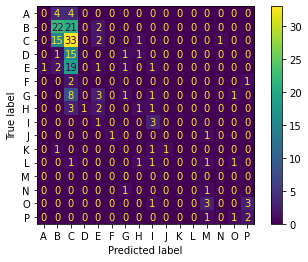

In [ ]:
# Matriz de Confusão entre classes de patamares de renda familial
plot_confusion_matrix(clf, enc.transform(X_test), y_test);

Não é de todo mal... 16 categorias e 31% de acurácia.

Mas dá pra ver que o modelo está chutando muito na categoria dominante (C) e errando bastante, porém com erros em categorias vizinhas.

O F1-score bem menor deixa esse diagnóstico mais claro, apontando para o problema de desbalanceamento de classes.


In [ ]:
# Usando validação cruzada 10-fold
scores = cross_val_score(clf, enc.transform(X), y, cv=10, scoring='f1_weighted')
scores

F:\progs\anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.24629371, 0.25879167, 0.27381096, 0.33626341, 0.31137037,
       0.28999357, 0.294082  , 0.23469697, 0.24472222, 0.29474036])

In [ ]:
print(f"F1-Score: {scores.mean():.3} (+/- {scores.std() * 2:.3})")

F1-Score: 0.278 (+/- 0.0618)


In [ ]:
# Testando outros modelos: SVM
from sklearn import svm
clf = svm.SVC(C=1.0).fit(enc.transform(X_train), y_train)
print(clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, clf.predict(enc.transform(X_test)), average='weighted')

0.28


0.20073954512105652

In [ ]:
# Testando outros modelos: Árvore de decisão Classificador
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(enc.transform(X_train), y_train)
print(clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, clf.predict(enc.transform(X_test)), average='weighted')

0.23


0.2263342875376008

In [ ]:
# Testando outros modelos: Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(enc.transform(X_train), y_train)
print(clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, clf.predict(enc.transform(X_test)), average='weighted')

0.305


0.2516893988364577

### Conclusão

Como de costume o Random Forrest funcionou bem, mas o modelo de regressão logística ficou um pouco melhor, com 31% de acurácia e 25,7% de F1-score

Como melhorar esse modelo?

Teste de one-hot encoding para as variáveis categóricas?
Inserção do pré-treinamento em um pipeline, avaliação com validação cruzada?
Busca por hiper parâmetros otimizados?

Outras abordagens:
O grão de distinção das classes de renda é relativamente baixo, talvez agregando um pouco mais essas classes de renda torne o resultado melhor?
Talvez distinguir apenas 3 níveis: baixo (-25%), médio (50%) e alto (+25%)

In [ ]:
colunas = ['SG_UF_RESIDENCIA', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
          'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df = pd.read_csv(path, 
                 nrows=100, # só as 100 primeiras linhas
                 encoding='latin-1', 
                 sep=';', usecols=colunas)
len(df)

In [ ]:
df

In [ ]:
# verificação de dados faltantes
total = df.isnull().sum().sort_values(ascending = False)
percentual = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
faltantes  = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
faltantes

In [ ]:
# tipos e dados faltantes
df.info()

In [ ]:
# Cria nota média
df['NOTA_MEDIA'] = (
    df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + 
    df['NU_NOTA_REDACAO']) / 5.0

df.head()

In [ ]:
# Elimina as linhas com nota média NaN, que provavelmente corresponde a alunos ausentes a alguma das provas
df.dropna(inplace=True)
print(len(df))
df.head()

In [ ]:
# 2.Proporcionalmente à população de alunos do estado, qual o estado com melhor despenho no ENEM?

# Selecionar os top 10 porcento das médiass alunos
nota_corte = df.NOTA_MEDIA.quantile(q=0.9)
nota_corte

In [ ]:
# 10% melhores
melhores =df.loc[df.NOTA_MEDIA >= nota_corte][['SG_UF_RESIDENCIA']].groupby('SG_UF_RESIDENCIA').size()
melhores

In [ ]:
# Toda a população de alunos que participou do ENEM
total = df[['SG_UF_RESIDENCIA']].groupby('SG_UF_RESIDENCIA').size()

In [ ]:
((melhores/total)*100).sort_values(ascending=False)

#### Sumarização simples

In [ ]:
# só numéricos
df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NOTA_MEDIA']].describe()

In [ ]:
# Dados categóricos
df.describe(include="O")

In [ ]:
# Pessoas com nota máxima em redação:
len(df[df.NU_NOTA_REDACAO == 1000])

In [ ]:
# Histograma das médias
df.NOTA_MEDIA.hist()

In [ ]:
# Ou mais elegante com Seaborn
sns.distplot(df.NOTA_MEDIA)

In [ ]:
# distribuição dos estudantes por estado
df.SG_UF_RESIDENCIA.value_counts()

In [ ]:
# De forma gráfica:
df.SG_UF_RESIDENCIA.value_counts().plot.bar(color='blue')

#### Nota média por patamar de renda

A renda familiar é codificada na Q006, por fatia de renda, de 0 a acima de R$ 17.600, nas letras A a Q

In [ ]:
import string
# 17 primeiras letras maiúsculas
ordem_renda = list(string.ascii_uppercase[:17])
print(ordem_renda)
#Q006_order=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]

In [ ]:
# distribuição do número de alunos por nível de renda
df.Q006.value_counts().plot.bar(color='blue')

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.violinplot(
    x="Q006", 
    y="NOTA_MEDIA", 
    data=df, # caso queira recortar por estado: df[(df.SG_UF_RESIDENCIA == {código de estado})]
    order=ordem_renda
    )
plt.title("Distribuição de notas por patamar de renda familiar")
plt.show()

#### Distribuição de notas por estado da federação

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.violinplot(
    x="SG_UF_RESIDENCIA",
    y="NOTA_MEDIA",
    data=df, # caso queira recortar por patamar de renda: df[(df.Q006 == {nível de renda, letra de A a Q})]
    )
plt.title("Distribuição de notas por estado")
plt.show()

## Reproduzir análise do Estadão
http://infograficos.estadao.com.br/educacao/enem/desigualdades-de-genero-e-raca/

O Estadão realiza diversas comparações entre a população geral dos alunos do Enem e o sub-grupo dos 1000 alunos que obtiveram as melhores notas. Esse recorte permite contrastar as características socioeconomicas e educacionais desses dois grupos.

Para refazer as análises do Estadão é necessário carregar as variáveis sexo, raça, escolaridade dos pais, cidade de residência e tipo de escola (pública/privada).

Da leitura do dicionário de dados, vê-se que essas são as variáveis: 
'TP_SEXO', 'TP_COR_RACA', 'Q001', 'Q002', 'NO_MUNICIPIO_RESIDENCIA', 'TP_ESCOLA'

Obs: 'Q001': escolaridade do pai, 'Q002': escolaridade da mãe

In [ ]:
# Liberar a memória utilizada pelo atual dataset:
del df
df = ""
gc.collect()

In [ ]:
colunas = ['SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA','TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'Q001', 'Q002', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
          'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_IDADE']
df = pd.read_csv(path, encoding='latin-1',
                 nrows=10000,
                 sep=';', usecols=colunas)
len(df)

In [ ]:
# 1.	Obter a média de desempenho por idade
df['NU_IDADE'].value_counts().sort_index()

In [ ]:
df['NOTA_MEDIA'] = (
    df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + 
    df['NU_NOTA_REDACAO']) / 5.0

In [ ]:
df[['NOTA_MEDIA', 'NU_IDADE']].groupby('NU_IDADE').mean().plot.bar();

In [ ]:
df[['NOTA_MEDIA', 'NU_IDADE']].groupby('NU_IDADE').mean().sort_values('NOTA_MEDIA', ascending=False).plot.bar();

In [ ]:
# Novamente, eliminar as linhas com nota faltante
df.dropna(inplace=True)

# Cria nota média
df['NOTA_MEDIA'] = (
    df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + 
    df['NU_NOTA_REDACAO']) / 5.0

print(len(df))

In [ ]:
# Selecionar os 1000 alunos com as melhores notas

# nota do milésimo aluno
top_notas = df.NOTA_MEDIA.nlargest(1000)

# distribuição das 1000 melhores médias
sns.distplot(top_notas)

In [ ]:
# menor das 1000 notas
nota_corte = top_notas.min()
nota_corte

In [ ]:
# Seleção dos 1000 alunos de maior média
top1000 = df[df.NOTA_MEDIA >= nota_corte]
len(top1000)

In [ ]:
# Comparações de proporção de gênero entre top1000 e população
df.TP_SEXO.value_counts()/len(df)*100

In [ ]:
top1000.TP_SEXO.value_counts()/len(top1000)*100

In [ ]:
# Correlação entre as notas?
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
# colunas = ['TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'Q001', 'Q002', 'Q006', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

#sns.set()
#sns.pairplot(df[colunas], height = 2.5)
#plt.show()

In [ ]:
# Como a quantidade de dados é muito elevada, os gráficos de correlação demoram muito para serem calculados e ficam saturados
# Uma solução sistemática é realizar uma subamostragem da população [aqui, 10% da população]
amostra = df.sample(frac=0.1, random_state=123)
len(amostra)

In [ ]:
sns.set()
sns.pairplot(amostra[colunas], height= 3.5, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})
# defino um alpha muito baixo devido ao grande número de pontos, para limitar o efeito de saturação
plt.show()

### Aplicar as diversas técnicas aprendidas até agora sobre o dataset ENEM:

* Pré-processamento: 
    * encoding de dados categóricos
    * normalização de dados numéricos
    * imputação de dados faltantes
    * seleção de features
* Particionamento treino/validação
* Modelos simples: avaliação, casos de erro
* Pipeline, cross validation...
